# This NoteBook Discuss Linear Regression For one Variable Step by Step

-----------------------------------------------------------------------------------------------------------------------


## 1 - importing The important Libraries

In [1]:
import numpy as np                #  --> using For mathematical operations
import pandas as pd               #  -->  using To handle dataset
import matplotlib.pyplot as plt   #  -->  using To create graphics

## 2- importing The Dataset

In [2]:
df=pd.read_csv("Salary_dataset.csv") # --> Read The dataset
df.head()                            # --> To display The dataset

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## 3- Cleaning The Dataset

In [3]:
df.columns              # --> To Display Name of Features

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [4]:
df.info()              # --> To Get All Informations of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()        # --> To Calculate " count , mean , std , min , max  " for each Coloumn

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isna().any()         # -->  To check any Nan value

Unnamed: 0         False
YearsExperience    False
Salary             False
dtype: bool

In [7]:
df.isnull().sum()       # --> To check any Null values

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.duplicated().any()  # --> To Check any duplicated values

False

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)  # --> To Delete The Coloumn from dataset

## 4- Solving The Problem Of Rescaling The DataSet

  By using StanderScaler

The Law : x = (x-mean) /standred divation

In [10]:
df.Salary = (df.Salary - df.Salary.mean()) / df.Salary.std() #  --> To Rescaling data in The Coloumn

## 5- Spliting The Dataset to Features and Samples

In [11]:
df.insert(0, 'constant', 1)  # --> To add The Coloumn to dataset

In [12]:
'''
I added a new column with all values equal one because I can't use a single column for the x value .

'''

x=df.iloc[:,0 : 2].values         # --> To choose the values of x 
y=df.iloc[:,-1:np.newaxis].values #--> To choose the values of y

In [13]:
x.shape # --> To display The Shape of x

(30, 2)

In [14]:
y.shape # --> To display The Shape of y

(30, 1)

##  6- Convert x,y,Theta From Frames To Numpy Matrix

In [15]:
'''
I will Convert x , y , Theta From Frames To  Matrixs to applying mathematical operations on her

'''
x=np.matrix(x)
y=np.matrix(y)
Theta=np.matrix(np.array([0,0]))

## 7- Bulid The Cost Function

The Law Of cost Function

J(θ)= 1/2 m ∑i pow ((h θ(x(i)) - y (i)) , 2)

In [16]:
def cost_funtion(x,y,Theta):
    
    z = np.power(((x * Theta.T)- y),2)  # -->  Hypothesis 'h(x)' = (x * Theta.T )

    return np.sum(z) / (2*len(x))       # -->  Number of Rows 'm' = len(x)   

In [17]:
print(f" The Ratio of Error : {cost_funtion(x,y,Theta) *100 :.2f} %")

 The Ratio of Error : 48.33 %


## 8- Bulid The Gradient Descent

θ New = θ old - alpha ( 1/m ∑i (h θ(x (i)) - y (i)) )

θ1 New = θ1 old - alpha ( 1/m ∑i (h θ(x (i)) - y (i)) * x1 )

In [18]:
'''
The Goal Of The Gradient Descent minimize The Ratio of Error "cost_funtion"

'''


def Gradient_descent(x,y,Theta,alpha,iters):
    
    
    temp = np.matrix(np.zeros(Theta.shape))  # --> create temporary varaible has The same shape of Theta and initial values equal zero
    parameter = int (Theta.ravel().shape[1]) # --> Create variable has The same number of Theta
    cost=np.zeros(iters)                     # --> Create variable has The same number of Iterations
    
    
    
    for i in range(iters):    # --> for 0 To iters-1
        
        Error=(x*Theta.T) - y  # -->  Hypothesis 'h(x)' = (x * Theta.T ) 
        
        
        for j in range(parameter):  # --> for 0 To 1
            
            term=np.multiply(Error,x[:,j])   # --> Multiply " (x*Theta.T) -y " of value of x
            
            temp[0,j]=Theta[0,j] - (alpha / len(x))* np.sum(term)  # --> Calculate The New value of Theta
            
            
        # --- updata The Theta ---
        
        Theta=temp
        
        # --- updata Cost Function ---
        
        cost[i] = cost_funtion(x,y,Theta)
        
    return Theta ,cost    

## 9- Initialize Varibles For Learning Rate and Iteraions

In [19]:
alpha=0.01    # --> The Learning Rate
iters=1500    # --> Number Of Iterations

## 10- Perform  Gradient Descent to fit Model Parameters

In [20]:
theta,cost=Gradient_descent(x,y,Theta,alpha,iters)

In [21]:
print(f" h(x) : {theta[0,0]} + {theta[0,1]} x1") # --> To Display The Best values of Theta 0 , Theta 1

 h(x) : -1.7802772607366943 + 0.33212380612484477 x1


In [22]:
print(f"The Ratio Of Error After Gradient Descent : {cost.mean() *100 :.2f} %")

The Ratio Of Error After Gradient Descent : 8.05 %


## 11- Get The Best Fit Line

In [23]:
x=np.linspace(df.YearsExperience.min(),df.YearsExperience.max(),100) # --> To Give 100 values of x

In [24]:
h=theta[0,0] + (theta[0,1] *x) # --> To calculate Hypothesis for each raw

## 12- Draw The Best Fit line

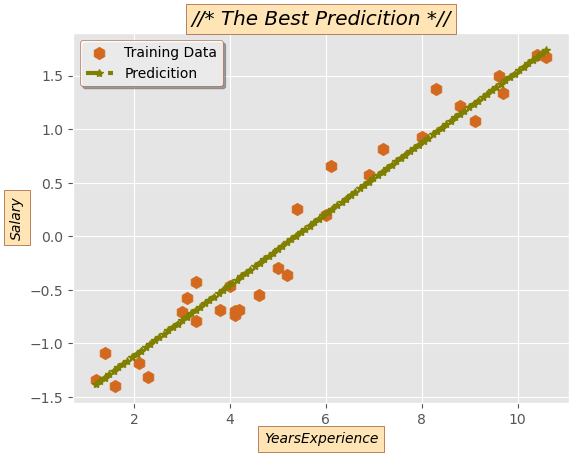

In [25]:
# --- style of colors ---
plt.style.use("ggplot")

# --- To create Title ---
plt.title("//* The Best Predicition *//" ,
          style="italic",
          color="k" ,
          bbox=dict(facecolor="moccasin",edgecolor="sienna",alpha=1))

# --- To create x label ---
plt.xlabel("YearsExperience",
           style="italic",
           color="k" ,
           bbox=dict(facecolor="moccasin",edgecolor="sienna",alpha=1))

# --- To create y label ---
plt.ylabel("Salary",
           style="italic",
           color="k" ,
           bbox=dict(facecolor="moccasin",edgecolor="sienna",alpha=1))

# --- To create The Points ---
plt.scatter(df.YearsExperience , df.Salary,
            s=80,
            c="chocolate" ,
            marker="h",
            alpha=1,
            label="Training Data")

# --- To create The line ---
plt.plot(x,h,"*--",color="olive",linewidth=3,label="Predicition")

# --- To create Information Box ---
plt.legend(loc="upper left",
           shadow="True",
           fancybox=True,
           frameon=True,
           framealpha=0.8,
           title=None,
           facecolor="w",
           edgecolor="sienna")

# --- To Display Graph ---

plt.show()

## 13- Draw Error Graph


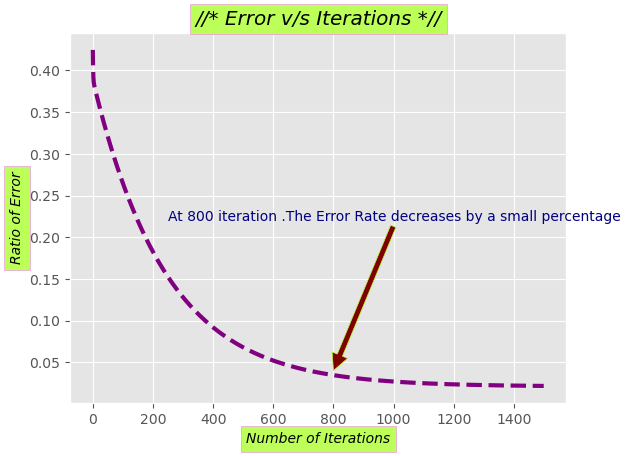

In [26]:
# --- To create Title ---
plt.title("//* Error v/s Iterations *//" ,
          style="italic",
          color="k" ,
          bbox=dict(facecolor="greenyellow",edgecolor="violet",alpha=0.8))

# --- To create x label ---
plt.xlabel("Number of Iterations",
           style="italic",
           color="k" ,
           bbox=dict(facecolor="greenyellow",edgecolor="violet",alpha=0.8))

# --- To create y label ---
plt.ylabel("Ratio of Error",
           style="italic",
           color="k" ,
           bbox=dict(facecolor="greenyellow",edgecolor="violet",alpha=0.8))

# --- To create The line ---
plt.plot(np.arange(iters),cost ,"--",linewidth=3,color="purple",label="show")

# --- To create Annotation on graph ---
plt.annotate("At 800 iteration .The Error Rate decreases by a small percentage",
             color="navy",
             xy=(800,0.04),
             xytext=(250,0.22),
             arrowprops=dict(shrink=3,facecolor="maroon",edgecolor="greenyellow"))

# --- To Display Graph ---
plt.show()